# Youtube Comment Analysis
- In this project i will do youtube comment analysis and checkc that weather the comment is positive or negative.

# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load Dataset

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
df.head()

clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1

# Data Preprocessing
- Sample of data
- Shape of data
- Data Types
- Null Values
- Duplicates

In [ ]:
df.sample(10)

clean_comment  category
35886   ram lala ham aayenge mandir wahi banayenge bo...         0
16769  because authoritarianism hot worldwide right n...         1
3027    have realized one thing there are two camps i...         0
34405   reserve judgement but his inspired modi doesn...         1
7372   yaar who ever becomes potus don think going ha...         1
10075   superflex standard scoring pick please lesean...         1
9874                team ppr terrelle pryor carlos hyde          0
1053   point out the line his speech where mentions b...         0
2009              glad see the captain take off trajore          1
33170  seriously this dumbwit approach find illegitim...        -1

# Observation
- We have 2 columns in this dataset.
  - `Clean Comments` => It show the comment of person
  - `Category` => It's show the category of Comments
    - We have 3 categories (1,0,-1)
      - `1` show the postive comments
      - `0` show the neutral comments
      - `-1` show the negative comments  

In [ ]:
# Shape of data
print(f"Data contain {df.shape[0]} rows and {df.shape[1]} Columns")

Data contain 37249 rows and 2 Columns


In [ ]:
df.dtypes

clean_comment    object
category          int64
dtype: object

In [ ]:
# Null Values
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

# Observation
- We can see that data contain 100 null values in `clean_comment` columns.
- Lets analysis the null values

In [ ]:
df[df['clean_comment'].isnull()]

clean_comment  category
413             NaN         0
605             NaN         0
2422            NaN         0
2877            NaN         0
3307            NaN         0
...             ...       ...
35975           NaN         0
36036           NaN         0
37043           NaN         0
37111           NaN         0
37238           NaN         0

[100 rows x 2 columns]

In [ ]:
df[df['clean_comment'].isnull()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

# Observation
- We can see that all the missing value are present in neutral comments.
- We have only 100 missing values.
- Now check the ratio of missing value

In [ ]:
print(f"Ratio of missing values: {df['clean_comment'].isnull().mean()*100}")

Ratio of missing values: 0.26846358291497757


# Observation
- we can see that we have 1% missing values
- So we can drop them

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Duplicates Values
df.duplicated().sum()

350

In [ ]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Now we will clean the comment columns
df.head(2)

clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1

# Comment Preprocessing
- We can remove the trailling character.
- Remove URLs if present
- Replace emojies with their meaning if present.
- Convert all the comments in lower case

In [ ]:
# Make a copy of df
temp=df.copy()

In [ ]:
df['clean_comment'][0]

' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches '

In [ ]:
# Remove the trailing character start and endi both
df['clean_comment']=df['clean_comment'].apply(lambda x: x.strip())

In [ ]:
df['clean_comment'][0]

'family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches'

In [ ]:
# Remove the urls here is the example

# Example text with URLs
text = "Visit our website at https://www.example.com or follow us on https://twitter.com for more info!"

# Regular expression pattern to remove URLs
url_pattern = r'http[s]?://\S+|www\.\S+'

# Replace URLs with an empty string
cleaned_text = re.sub(url_pattern, '', text)

print("Text without URLs:", cleaned_text)

Text without URLs: Visit our website at  or follow us on  for more info!


In [ ]:
url_pattern = r'http[s]?://\S+|www\.\S+'
df['clean_comment']=df['clean_comment'].apply(lambda x: re.sub(url_pattern, "", x))

In [ ]:
# Convert all the text into lower cawe
df['clean_comment']=df['clean_comment'].apply(lambda x: x.lower())

In [ ]:
# Remove all the \n and \t and with emoty ""
df[df['clean_comment'].str.contains("\n")]

clean_comment  category
448    what missing jpg\nand why this brilliant edit ...         1
781    india has been ruined congress and populist sc...        -1
847    like aap for its stand corruption and making p...        -1
871    reduced trade\ndeficit stronger rupee aren the...         0
1354   amsa press conference australian maritime safe...         1
...                                                  ...       ...
35128  火箭o辛基 2016 sughosh bansal mission “make india”...        -1
35230  yikes the title should blind bhakts modi hater...         1
36187                 hahahahahhahahah \niska klpd hogya         0
36517                         ्ा् ी ाी े ो ेी ाी े।\nे ी         0
36919  y6sg1xuovbb0czfwjpug0h html\nfull credit anti ...         1

[204 rows x 2 columns]

In [ ]:
df['clean_comment']=df['clean_comment'].apply(lambda x: x.replace("\n"," "))

In [ ]:
df[df['clean_comment'].str.contains("\n")]

Empty DataFrame
Columns: [clean_comment, category]
Index: []

# EDA

In [ ]:
df['category'].value_counts(normalize=True)*100

category
 1    42.857143
 0    34.723770
-1    22.419087
Name: proportion, dtype: float64

<Axes: xlabel='category'>

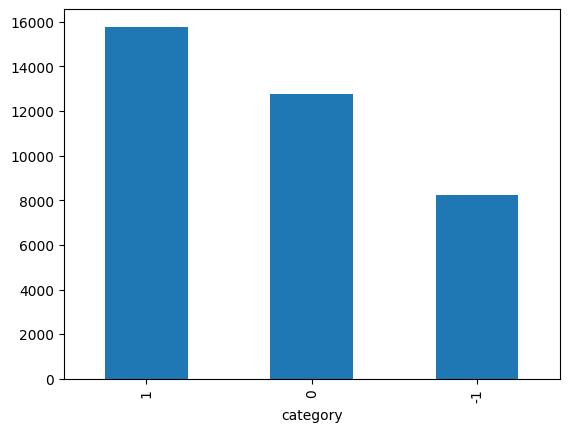

In [ ]:
# Check the distrubutuion of Categories
df['category'].value_counts().plot(kind="bar")

# Observation
- It is clearly show that data is totally `imbalance`
- `42.857143` values are in category `1`
- `34.723770` values are in category `0`
- `22.419087` values are in category `-1`

In [ ]:
df.head(1)

clean_comment  category
0  family mormon have never tried explain them th...         1

# Next Step
- Now we can check the total nbr of words, total nbr of sentence of each comment

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['total_words']=df['clean_comment'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
df['total_sent']=df['clean_comment'].apply(lambda x: len(sent_tokenize(x)))

In [ ]:
df.head(2)

clean_comment  category  total_words  \
0  family mormon have never tried explain them th...         1           39   
1  buddhism has very much lot compatible with chr...         1          196   

   total_sent  
0           1  
1           1

In [ ]:
df['total_words'].describe()

count    36799.000000
mean        29.761705
std         57.144525
min          0.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: total_words, dtype: float64

# Observation
- It is clearly see that there are a lot of outlites
- `Mean` should be `29`
- `Std` is `57`
- `Min` value is 0.
- `25%`value	is `6.000000`
- `50%`	value is `13.000000`
- `75%` value is `30.000000`
- `max`	value  is `1307.000000`

- **We see that min value 0 its show that there are some comments whose does not contain any value mean these are empty comments.**
- **Now we will verify those and we will remove those**

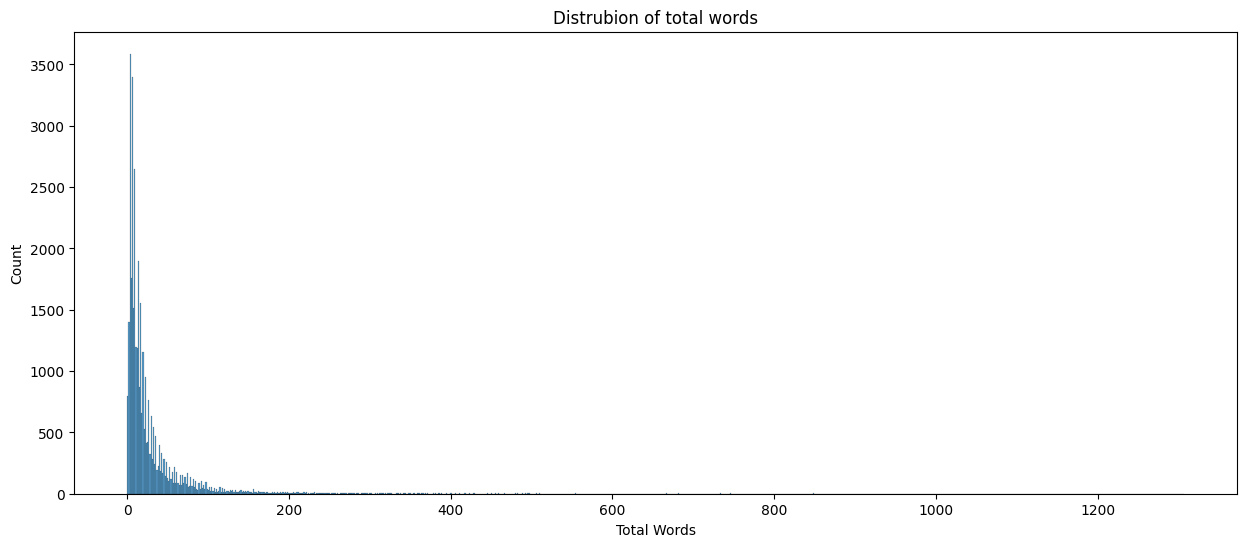

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Distrubion of total words")
sns.histplot(df['total_words'])
plt.xlabel("Total Words")
plt.ylabel("Count")
plt.show()

In [ ]:
# Check those comment who can't contain any value
df[df['clean_comment']==""]

clean_comment  category  total_words  total_sent
181                         0            0           0
4432                        0            0           0
10592                       0            0           0
16173                       0            0           0
32149                       0            0           0
34959                       0            0           0

**These are the values those contain empty values now we will remove these rows**

In [ ]:
df=df[~(df['clean_comment']=="")]

In [ ]:
df['total_words'].describe()

count    36793.000000
mean        29.766559
std         57.147920
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: total_words, dtype: float64

# Next i can see
- I can see that there are some more rows that contain only `one single` words now we will also check it later

In [ ]:
# Rows that containlt only single words
df[df['total_words']==1].sample(10)

clean_comment  category  total_words  total_sent
21370          woke         0            1           1
10912          html         0            1           1
5205          amaze         0            1           1
19835        optics         0            1           1
35196       classic         1            1           1
3566           swag         0            1           1
31299       gujarat         0            1           1
27237         agroo         0            1           1
36923         twist         0            1           1
34593    mitroooooo         0            1           1

In [ ]:
# Now we will check those rows whre total word is > or = 1300
df[df['total_words'] >=1300]['clean_comment']

8646     brilliant point point breakdown one other argu...
30639    what your opinion about social media being use...
Name: clean_comment, dtype: object

# Observation
- We will see that there are only 2 rows who values is > 1300 we will handle later

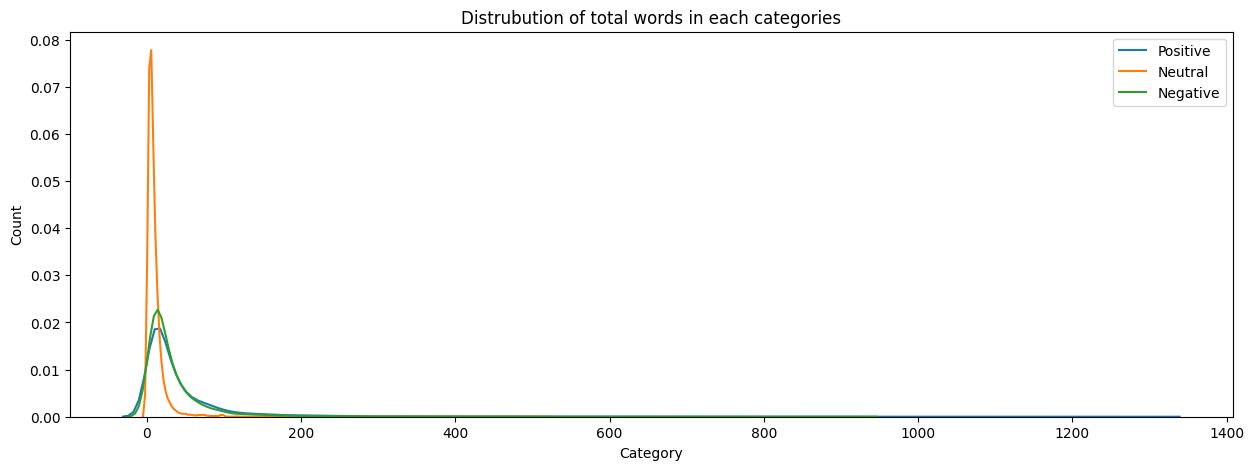

In [ ]:
# checkout the distrubution of each category
plt.figure(figsize=(15,5))
plt.title("Distrubution of total words in each categories")
sns.kdeplot(df[df['category']==1]['total_words'],label="Positive")
sns.kdeplot(df[df['category']==0]['total_words'],label="Neutral")
sns.kdeplot(df[df['category']==-1]['total_words'],label="Negative")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend()
plt.show()

# Observation
- It is clearly show that there is very less nbr words used in `neutral comments`

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


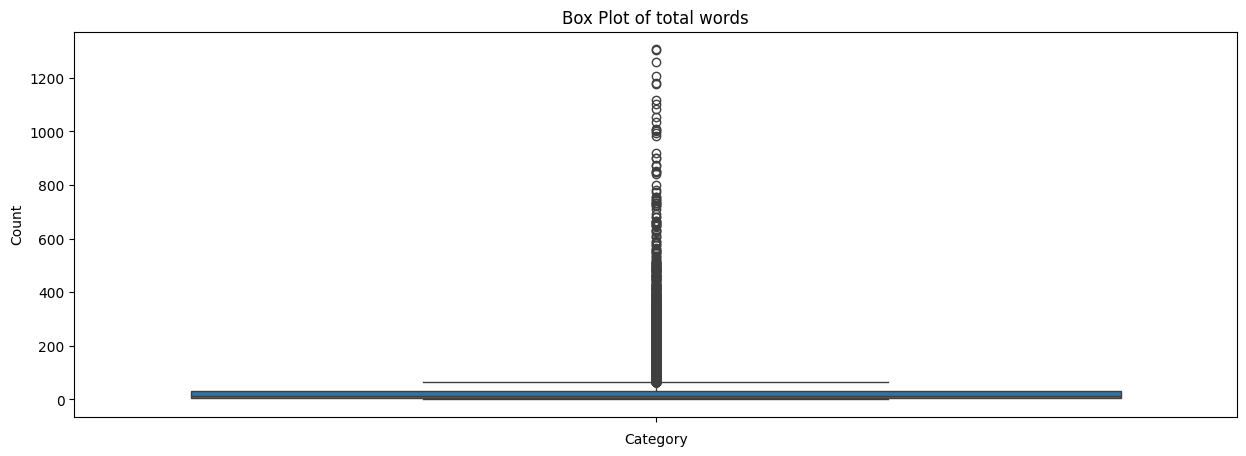

In [ ]:
# checkout the distrubution of each category
plt.figure(figsize=(15,5))
plt.title("Box Plot of total words")
sns.boxplot(df['total_words'])
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

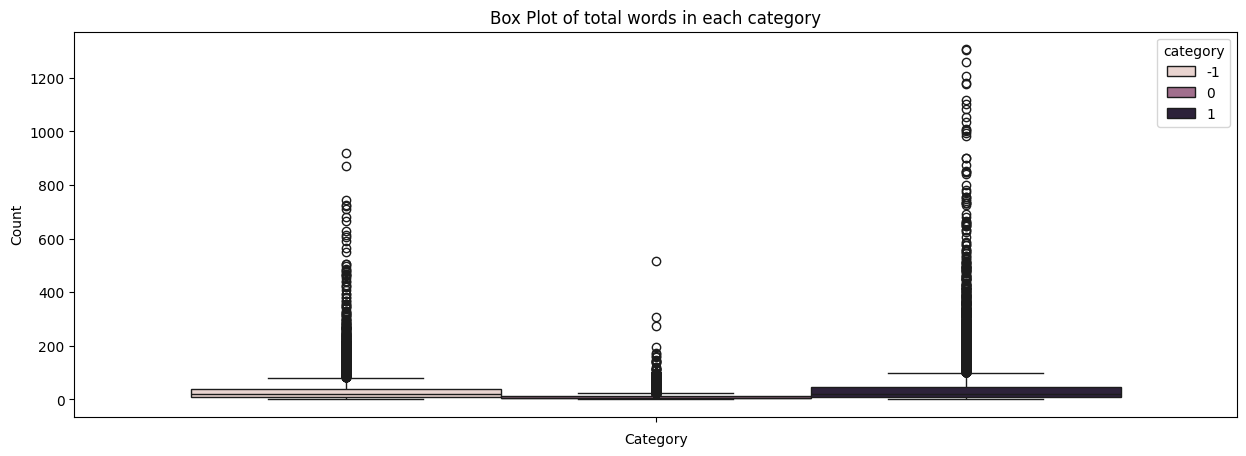

In [ ]:
# checkout the distrubution of each category
plt.figure(figsize=(15,5))
plt.title("Box Plot of total words in each category")
sns.boxplot(y=df['total_words'],hue=df['category'])
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Observation
- It is clearly show the there are alot of outlires in `postive category`
- There are very less nbr of outliers in `neutral category`
* **Reason**
  - The reason is `positive comments` is greater then `neutral comments`

# Distrubution of sentences

In [ ]:
df['total_sent'].describe()

count    36793.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: total_sent, dtype: float64

# Observation
- It is show that each  comment contain maximumn one sentence

# Next Stage
- Convert the text into lower case
- Remove the stop words
- Remove the punctuation
- Apply stemming and lemmatization
- Apply tf-idf

In [ ]:
# We already convert the text in lower case in previpous

# Remove Stop words
* First we will check that removel of the stopwords can effect the sentence we will not remove those stop words.
* If the removal of stopwords can't effect the sentence then we will remove the stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# first we will view the stopwods
total_comments=df['clean_comment'].tolist()

# total_comments

In [ ]:
total_stop_words=[]
for words_list in total_comments:
  words=words_list.split()
  for word in words:
    if word in stopwords.words('english'):
      total_stop_words.append(word)

In [ ]:
# Now count the stop words
from collections import Counter

stop_words_count=Counter(total_stop_words)

In [ ]:
df2=pd.DataFrame(stop_words_count.items(),columns=['Stop Words','Count'])
df2.head()

Stop Words  Count
0       have   8380
1       them   2956
2       they   8654
3       from   4965
4       some   2901

In [ ]:
df2=df2.sort_values(by='Count',ascending=False)
df2.head()

Stop Words  Count
6         the  57669
7         and  28950
12       that  15372
17       this  13463
5         for  12976

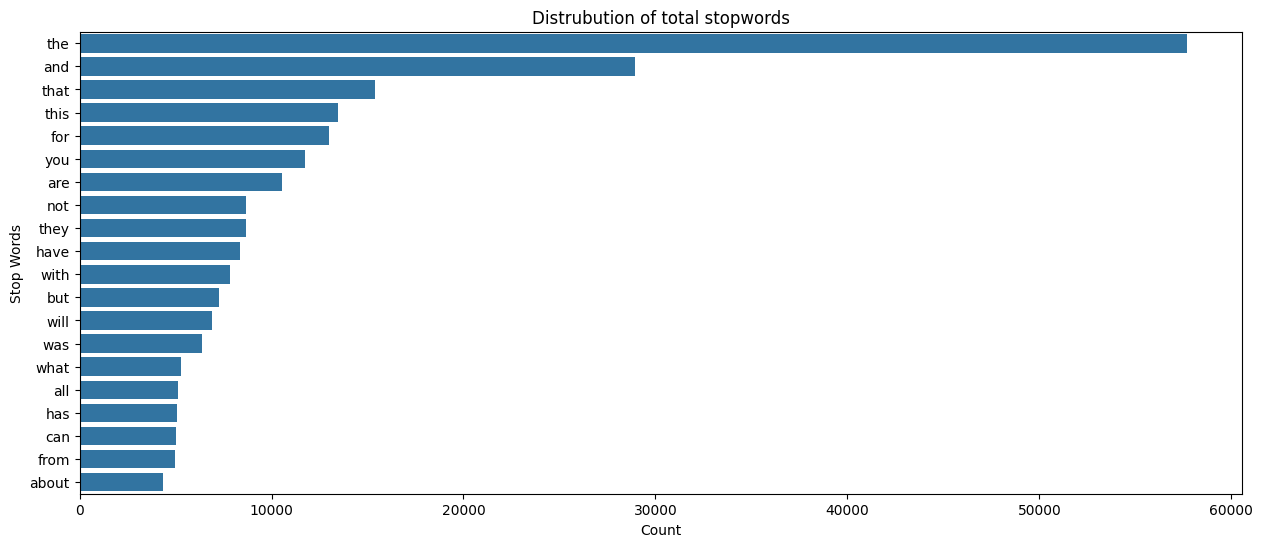

In [ ]:
# Plot the top 20 words
plt.figure(figsize=(15,6))
plt.title("Distrubution of total stopwords")
sns.barplot(y=df2.head(20)['Stop Words'],x=df2.head(20)['Count'])
plt.xlabel("Count")
plt.ylabel("Stop Words")
plt.show()

# Observation
- We will see that `Some words` are important like `not, but` like that if we can remove these words they will effect my model generalization.
- Now we can't remove these words

In [ ]:
final_df=df.copy()

In [ ]:
# Mow remove the unecessary stopwords
final_df.head(2)

clean_comment  category  total_words  \
0  family mormon have never tried explain them th...         1           39   
1  buddhism has very much lot compatible with chr...         1          196   

   total_sent  
0           1  
1           1

In [ ]:
final_df['clean_comment']=final_df['clean_comment'].apply(lambda x:
                                  " ".join([word for word in x.split() if word not in  set(stopwords.words('english'))-set(["not","but",'because','not','never','no'])])
                                )

In [ ]:
final_df['clean_comment'][0]

'family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed things buddhism teaches'

In [ ]:
df['clean_comment'][0]

'family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches'

# Observation
- See that we can remove the stopwords form our data

# Remove the punctuation

In [ ]:
final_df['clean_comment']=final_df['clean_comment'].apply(lambda x: re.sub("[^a-zA-Z0-9 .,!?]","",x)) # also kept the important symbols

In [ ]:
final_df['clean_comment']

0        family mormon never tried explain still stare ...
1        buddhism much lot compatible christianity espe...
2        seriously say thing first get complex explain ...
3        learned want teach different focus goal not wr...
4        benefit may want read living buddha living chr...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                            facebook working bjp cell
Name: clean_comment, Length: 36793, dtype: object

# Stemming and lemitization

In [ ]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def stemming(text):
  lemitizer=WordNetLemmatizer()

  return " ".join([lemitizer.lemmatize(word) for word in text.split()])

In [ ]:
stemming("You are dancing")

'You are dancing'

In [ ]:
final_df['clean_comment']=final_df['clean_comment'].apply(stemming)

In [ ]:
final_df['clean_comment']

0        family mormon never tried explain still stare ...
1        buddhism much lot compatible christianity espe...
2        seriously say thing first get complex explain ...
3        learned want teach different focus goal not wr...
4        benefit may want read living buddha living chr...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                            facebook working bjp cell
Name: clean_comment, Length: 36793, dtype: object

# Make a Word Cloud

In [ ]:
positive = " ".join(final_df[final_df['category']==1]['clean_comment'].tolist())
positive

'family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed thing buddhism teach buddhism much lot compatible christianity especially considering sin suffering almost thing suffering caused wanting thing want going getting thing wrong way christian would mean wanting thing coincide god wanting thing coincide but without aid jesus buddhism could also seen proof god mighty omnipotence certainly christian lucky one christ side but everyone else well many christian believe god grace salvation buddhism god way showing grace upon others would also help study thing jesus said see buddha made similar claim rich man getting heaven joke basically advocating rid material possession fact distinctly remembered jesus making someone cry because someone asked achieve salvation jesus replied live like buddhist roughly translated also point buddha rarely spoke anything god theory personal

In [ ]:
negative = " ".join(final_df[final_df['category']==-1]['clean_comment'].tolist())
negative

'seriously say thing first get complex explain normal people anyway dogmatic matter say see mechante post reason decide later life move buddhism suit identity though still get keep wisdom family treat like went weird hippy phase didncha never hear end pro tip put one wall jpg sit together watch simpson episode lisa becomes buddhist simpson season episode little faith discus two variety christian dogmatic dwell word conservative take heart spirit teaching hate oversimplify thing but help understanding discussing dogmatic religious people live letter law uphill battle wish luck discussing moderate exchange idea come fairly easily comparing contrasting also discussing parallel teaching presented differently ordinary may give relevant spiritual advice even though not believer religion evil include lady pai chunked technically could argue sobek evil would represent power also crocodile whereas also represents fertile land also guy could shapeshift crocodile badass though good suggestion add

In [ ]:
neutral = " ".join(final_df[final_df['category']==0]['clean_comment'].tolist())
neutral

'learned want teach different focus goal not wrapping paper buddhism passed others without word buddha jesus zen meet jew zarus blood soul lord arioch name shall lump wherever lump wart tree burl breast humpback whale nam indeed jbdbx28pxga maybe ate dosa know kahin dubara r nahi join kar congress eliminate namo blame advani seeing uvjx3kwoehw video seems anything possible congress party 27 law headline yeah got suicide wish poster said aftermath gonna one biggest communal riot atleast gujarat question anyone gujarati not vote modi want know prevalent casteism especially untouchability gujarat gujarati muslim speak gujarati first language urdu dialect much internal migration gujarat state bihar etc percentage gujarati speak hindi english tell something gujarati try etc impress gujju girl begin please downvote thread comment interest state leave alone complaining politics please something constructive ask talk state people instead leaving one liner modi message devarshi patel ultimate r

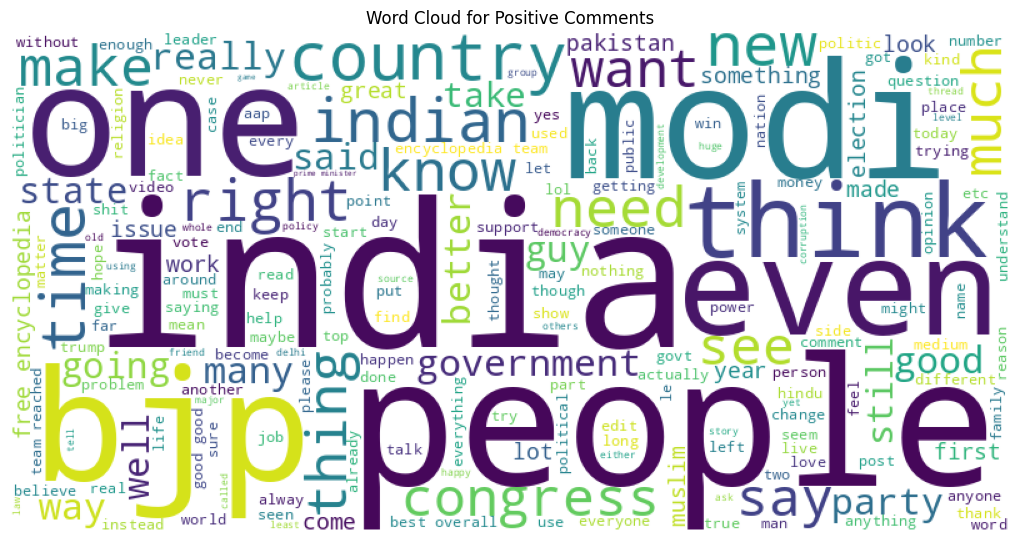

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud for positive comments
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud for Positive Comments")
plt.show()

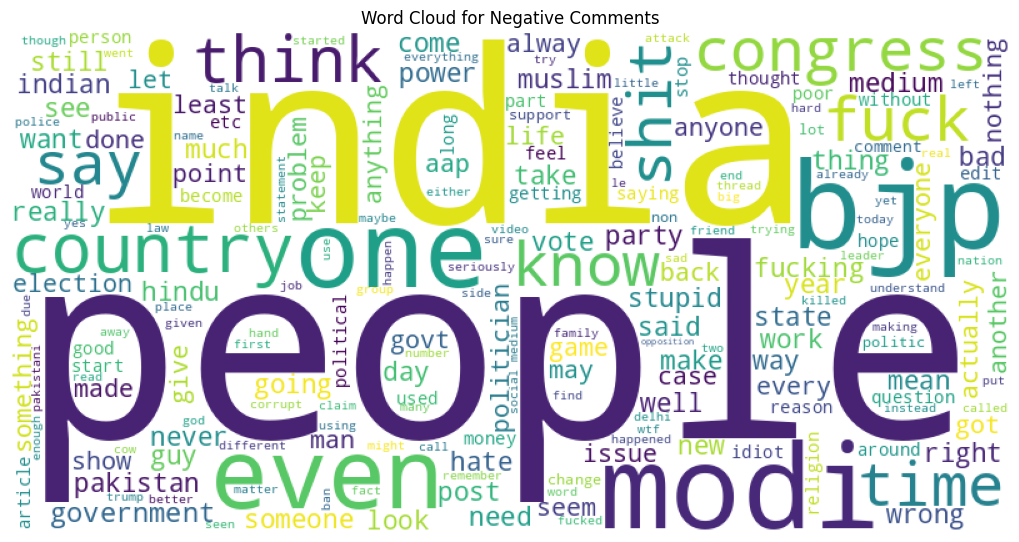

In [ ]:
# Create a WordCloud for negative comments
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud for Negative Comments")
plt.show()

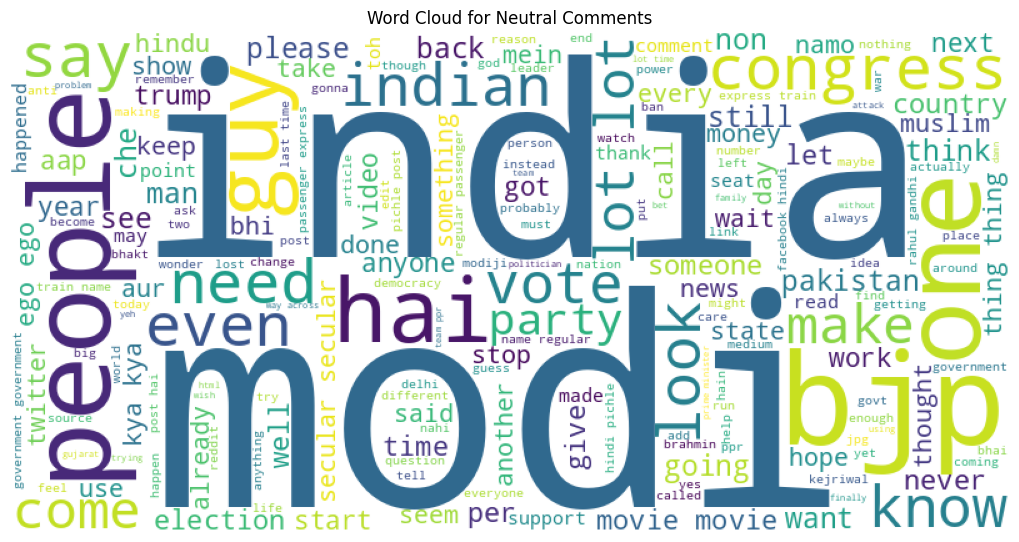

In [ ]:
# Create a WordCloud for neutral comments
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_neutral)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud for Neutral Comments")
plt.show()

In [ ]:
# Now convert the text into vector